In [2]:
from dipy.reconst.ivim import IvimModel, ivim_function
from dipy.data.fetcher import read_ivim
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
img, gtab = read_ivim()

data = img.get_data()
print('data.shape (%d, %d, %d, %d)' % data.shape)

z = 33
b = 20

Dataset is already in place. If you want to fetch it again please first remove the folder /home/shahnawaz/.dipy/ivim 
data.shape (256, 256, 54, 21)


In [4]:
x1, x2 = 160, 180
y1, y2 = 90, 110
data_slice = data[x1:x2, y1:y2, z, :]

In [5]:
# Let us do some profiling with several choices for model parameters,
# fit1,fit2,fit3,fit4,fit5 are the fits

# Using the numerical Jacobians
ivimmodel1 = IvimModel(gtab, fit_method="one_stage", jac=None)
ivimmodel2 = IvimModel(gtab, fit_method="two_stage", jac=None)

# Using the Jacobian function defined
ivimmodel3 = IvimModel(gtab, fit_method="one_stage", jac=True)
ivimmodel4 = IvimModel(gtab, fit_method="two_stage", jac=True)

# Changing the split_b_value
ivimmodel5 = IvimModel(gtab, fit_method="two_stage", split_b=500, jac=True)

In [6]:
%timeit ivimmodel1.fit(data_slice)
print ("Time for one stage fitting with numerically approx Jac")

%timeit ivimmodel2.fit(data_slice)
print ("Time for two stage fitting with numerically approx Jac")


/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in multiply
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))


1 loop, best of 3: 1.21 s per loop
Time for one stage fitting with numerically approx Jac


/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 loop, best of 3: 1.73 s per loop
Time for two stage fitting with numerically approx Jac


In [7]:
%timeit ivimmodel3.fit(data_slice)
print ("Time for one stage fitting with Jac defined")

%timeit ivimmodel4.fit(data_slice)
print ("Time for two stage fitting with Jac defined")

/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in multiply
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 loop, best of 3: 1.17 s per loop
Time for one stage fitting with Jac defined


/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))


1 loop, best of 3: 2.29 s per loop
Time for two stage fitting with Jac defined


In [8]:
%timeit ivimmodel5.fit(data_slice)
print ("Time for two stage fitting with split_b = 300")

/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))


1 loop, best of 3: 3.26 s per loop
Time for two stage fitting with split_b = 300


In [9]:
fit1 = ivimmodel1.fit(data_slice)
fit2 = ivimmodel2.fit(data_slice)
fit3 = ivimmodel3.fit(data_slice)
fit4 = ivimmodel4.fit(data_slice)
fit5 = ivimmodel5.fit(data_slice)

/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))
/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/shahnawaz/dev/gsoc16/dipy/dipy/reconst/ivim.py:60: RuntimeWarning: overflow encountered in multiply
  S = S0 * (f * np.exp(-bvals * D_star) + (1 - f) * np.exp(-bvals * D))


In [10]:
def plot(i,j):
    plt.figure(figsize=(20,10))
    plt.plot(gtab.bvals, ivim_function(fit1.model_params[i][j], gtab.bvals),
                                       color="blue", label="one_stage", ls="-")
    plt.plot(gtab.bvals, ivim_function(fit2.model_params[i][j], gtab.bvals),
                                       color="black", label="two_stage")
#     plt.plot(gtab.bvals, ivim_function(fit3.model_params[i][j], gtab.bvals),
#                                        color="yellow", label="one_stage_jac", ls="--")
#     plt.plot(gtab.bvals, ivim_function(fit4.model_params[i][j], gtab.bvals),
#                                        color="green", label="two_stage_jac", ls="-")
    
#     plt.plot(gtab.bvals, ivim_function(fit5.model_params[i][j], gtab.bvals),
#                                        color="orange", label="test_jacobian", ls="-")
    
    plt.scatter(gtab.bvals, data_slice[i][j], color="red", label="actual")
    plt.legend()
    plt.show()

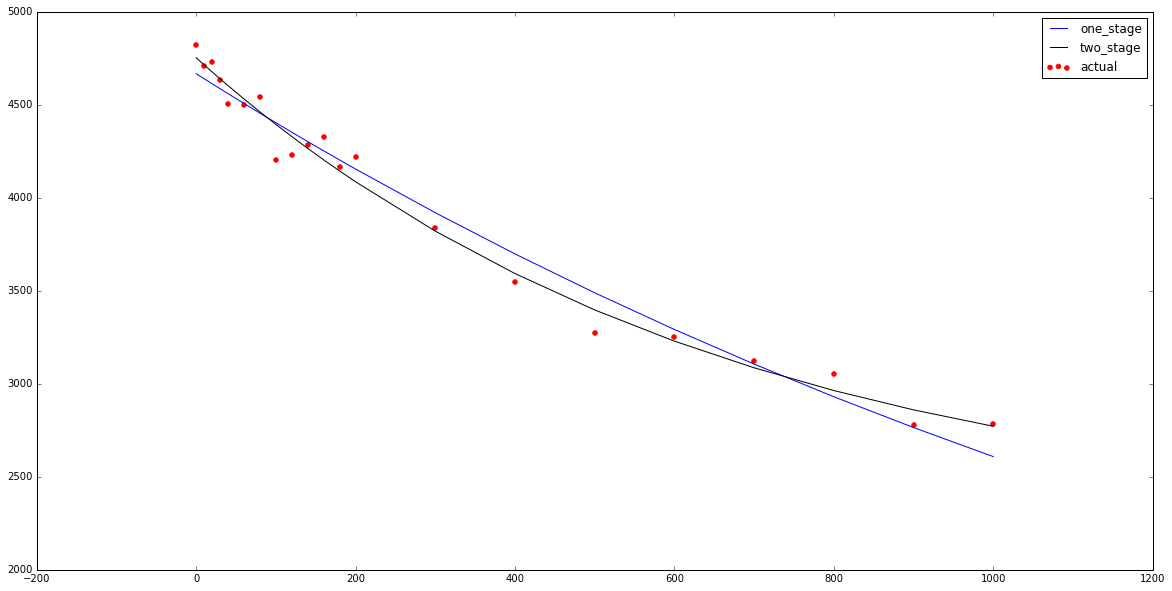

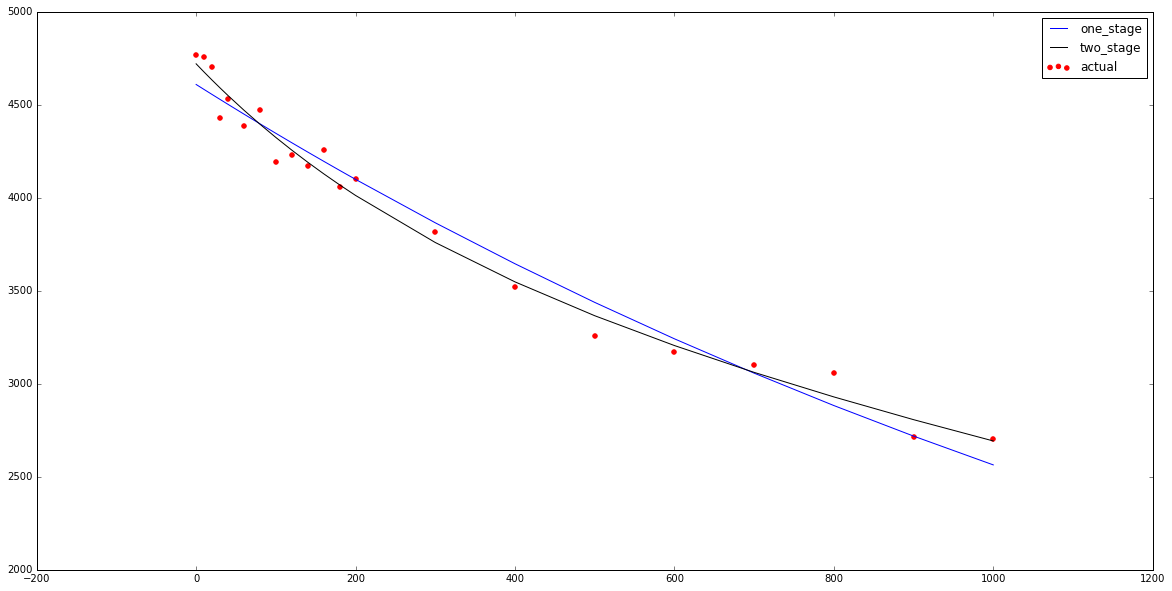

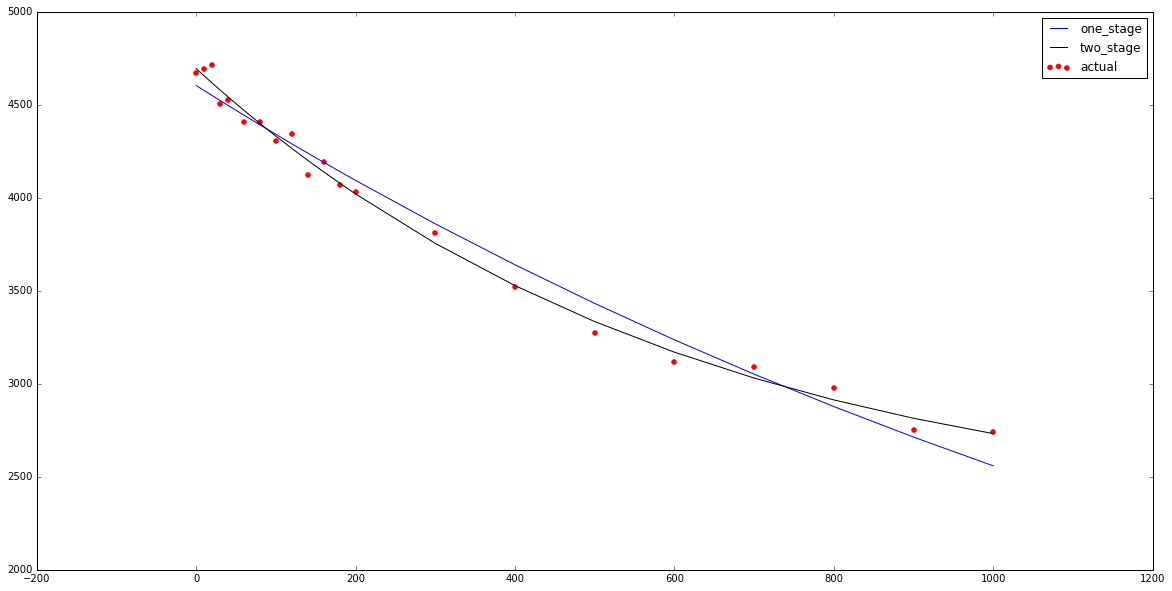

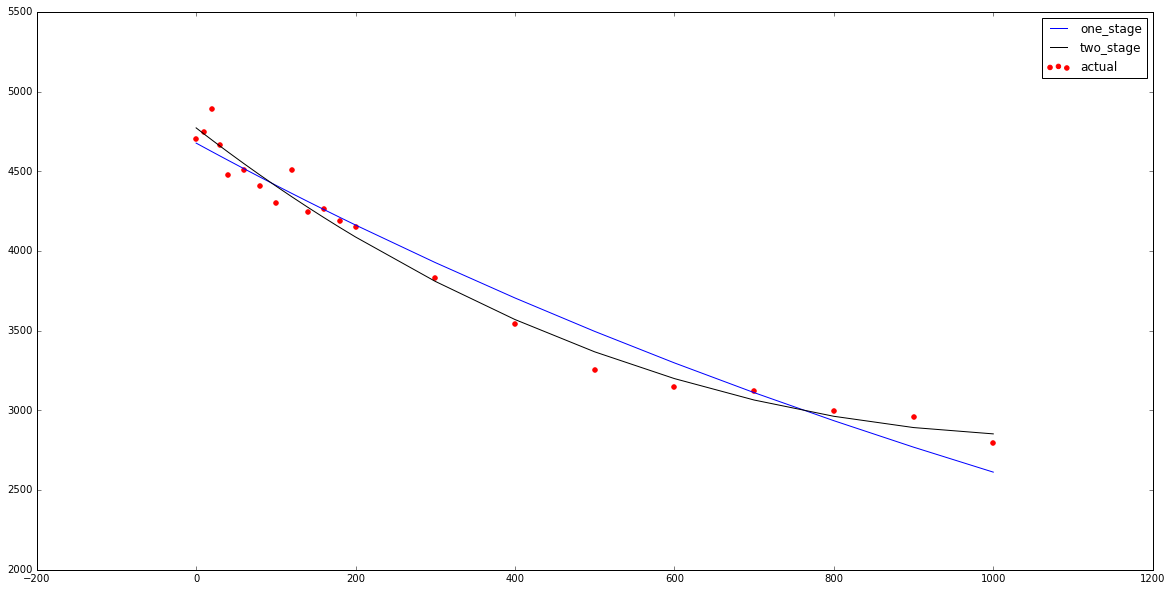

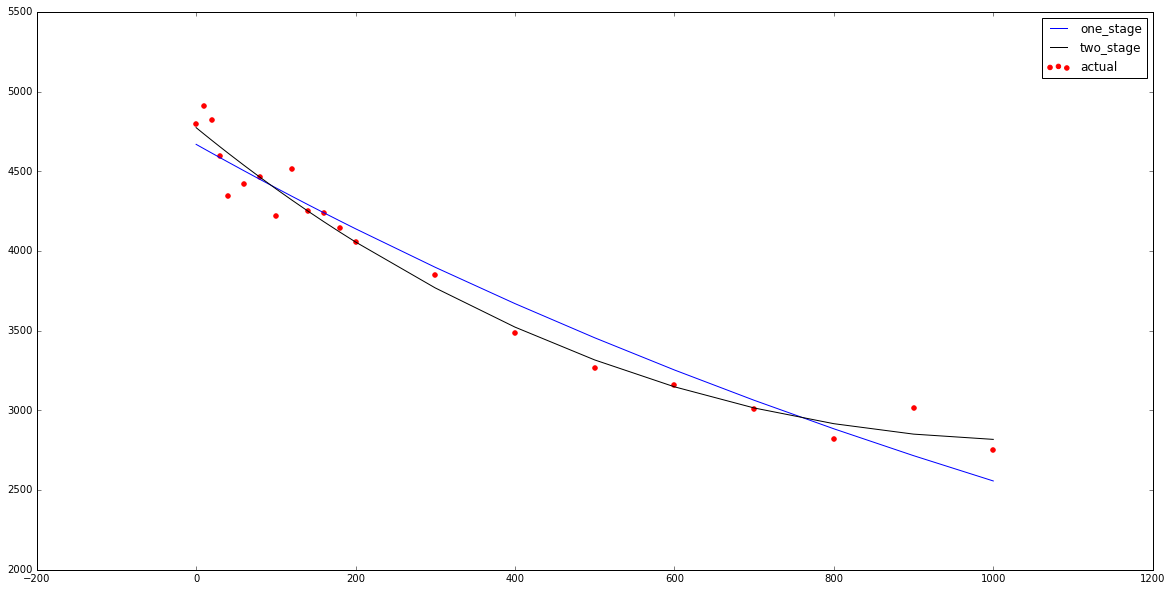

In [11]:
for i in np.arange(0,5) :
    plot(i,i)

In [12]:
def displ_params(i,j):
    print("For : ", i,j)
    print(fit1.model_params[i,j])
    print(fit2.model_params[i,j])
    print(fit3.model_params[i,j])
    print(fit4.model_params[i,j])
    print(fit5.model_params[i,j])
    print("\n")

In [13]:
for i in np.arange(0,5) :
    displ_params(i,i)

For :  0 0
[  4.66735904e+03  -5.33969720e-01   5.81934887e-04   5.81846292e-04]
[  4.75294170e+03   5.85268649e-01   1.43376671e-03  -6.73639600e-05]
[  4.66735701e+03  -5.35435533e-01   5.81709793e-04   5.81766870e-04]
[  4.75294866e+03   5.85240872e-01   1.43381616e-03  -6.73281570e-05]
[  4.75294762e+03   5.85240933e-01   1.43381628e-03  -6.73280683e-05]


For :  1 1
[  4.60931400e+03  -6.51737170e-01   5.86596766e-04   5.86547415e-04]
[  4.72027421e+03   1.60683090e-01   3.87161801e-03   3.92027960e-04]
[  4.60928052e+03  -5.33294732e-01   5.86455487e-04   5.86492219e-04]
[  4.72027334e+03   1.60681321e-01   3.87165949e-03   3.92030045e-04]
[  4.72027437e+03   1.60676756e-01   3.87176292e-03   3.92035315e-04]


For :  2 2
[  4.60383194e+03  -5.02505755e-01   5.87284060e-04   5.87338587e-04]
[  4.69459951e+03   5.97051322e-01   1.46147601e-03  -9.59536776e-05]
[  4.60384740e+03  -5.09639871e-01   5.87312132e-04   5.87343870e-04]
[  4.69460250e+03   5.97047707e-01   1.46148219e-03  